##### Nushath MNM
##### 190423H
## Assignment 2

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.patches import Circle

In [3]:
#Q1
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1), y.reshape(half_n , 1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1) , y.reshape(half_n , 1)))
X = np.vstack((X_circ , X_line))

In [5]:
def findRandom(data, n):
    count = 0
    sample = []

    while count < n:
        index = np.random.randint(len(data))
        x = data[index][0]
        y = data[index][1]

        if (x, y) not in sample:
            sample.append((x, y))
            count += 1

    return sample

In [6]:
def getCircle(p1, p2, p3):

    X = np.array([[p2[0] - p1[0], p2[1] - p1[1]], [p3[0] - p2[0], p3[1] - p2[1]]]) 
    Y = np.array([[p2[0]**2 - p1[0]**2 + p2[1]**2 - p1[1]**2], [p3[0]**2 - p2[0]**2 + p3[1]**2 - p2[1]**2]])		

    x, y = np.dot(inv(X), Y) / 2
    x, y = x[0], y[0]
    r = np.sqrt((x - p1[0])**2 + (y - p1[1])**2)

    return (x, y, r)

In [7]:
def checkCircle(circle, data, threshold):
    inliers = []
    x = circle[0]
    y = circle[1]
    r = circle[2]

    X = data[:, 0]
    Y = data[:, 1]
    distance = 0

    for i in range(len(X)):
        d = np.sqrt((X[i] - x)**2 + (Y[i] - y)**2)

        if abs(d - r) <= threshold:
            inliers.append([X[i], Y[i]])
            distance += abs(d - r)
    
    return inliers, distance

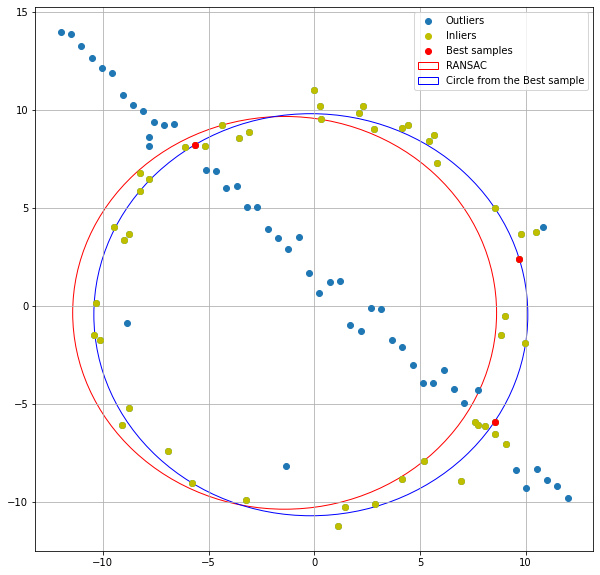

In [50]:
x_data = X[:, 0]
y_data = X[:, 1]
N = 35
inlier_threshold = r/8
inlier_count_threshold = 50
best_model = [0, 0, 999999, []]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X[:,0], X[:, 1], 'o', label='Outliers')
ax.grid(True)


for i in range(N):
    sample = findRandom(X, 3)
    initial_circle = getCircle(sample[0], sample[1], sample[2])

    if abs(r - initial_circle[2]) > 1.5*r:
        continue
    
    inliers, toal_distance = checkCircle(initial_circle, X, inlier_threshold)
    
    if len(inliers) < inlier_count_threshold:
        continue

    inlier_sample = findRandom(inliers, 3)
    circle = getCircle(inlier_sample[0], inlier_sample[1], inlier_sample[2])
    inliers, toal_distance = checkCircle(initial_circle, X, inlier_threshold)
    if len(inliers) < inlier_count_threshold:
        continue
    if len(best_model[-1]) < len(inliers):
        best_model = [circle, initial_circle, sample, toal_distance, inliers]
    elif len(best_model[-1]) == len(inliers):
        if best_model[3] > toal_distance:
            best_model = [circle, initial_circle, sample, toal_distance, inliers]

if len(best_model[-1]) == 0:
    print("No best model found")

else:
    inliers = np.array(best_model[-1])
    ax.plot(inliers[:, 0], inliers[:, 1], 'o',color= 'y', label='Inliers')

    best_samples = np.array(best_model[2])
    ax.plot(best_samples[:,0], best_samples[:, 1], 'o', color= 'r', label='Best samples')

    a, b, r = best_model[0][0], best_model[0][1], best_model[0][2]
    circle = Circle((a, b), radius=r, color='r', fc='y', fill=False, label='RANSAC')
    ax.add_patch(circle)

    a, b, r = best_model[1][0], best_model[1][1], best_model[1][2]
    init_circle = Circle((a, b), radius=r, color='b', fc='y', fill=False, label='Circle from the Best sample')
    ax.add_patch(init_circle)

ax.legend()